Campaign for selling personal loans.

This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.


<H1> 1. Reading the column description and understanding each attribute well </H1>

In [123]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


bank = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
bank.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [105]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [106]:
bank.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


<H1> 2. Studying the data distribution in each attribute</H1>

In [107]:
bank.groupby(["Personal Loan"]).count()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


<H5>About 10.6 % of the 5000 customers have accepted the loan as a result after the campaign.</H5>

<H3> Income range of customers who availed the loan. </H3>

Text(0.5,0,'income')

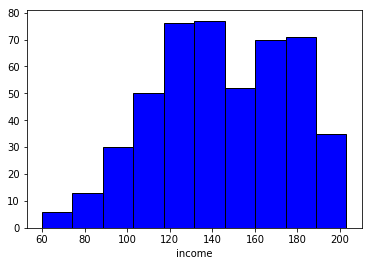

In [108]:
acceptedloan = bank.loc[bank['Personal Loan'] ==1]
plt.hist(acceptedloan['Income'], bins = 10,color = 'blue', edgecolor = 'black')
plt.xlabel('income')

<H5> Observation : Based on the income details customers with less than $60,000 income have not availed any loans  </H5>

<H3> Boxplot distribution of families and their income  who accepted the loan <H3>

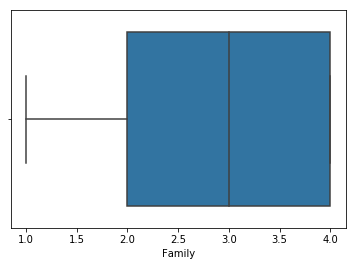

In [109]:
sns.boxplot(x=acceptedloan['Family'])



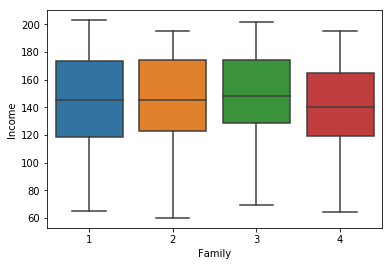

In [110]:
sns.boxplot(x=acceptedloan['Family'], y= acceptedloan['Income'])

<H5>Observation : This indicates that family size of 3 are more likely to take loans whose average income is of the range of 1,25,000  to  $1,77,000</H5>

<H3>Distribution of Mortgage value of customers who availed loan </H5>

(array([312.,   0.,   9.,  16.,  11.,  11.,  14.,  11.,  10.,  20.,   9.,
         12.,   9.,  10.,   5.,   5.,   1.,   3.,   7.,   5.]),
 array([  0.  ,  30.85,  61.7 ,  92.55, 123.4 , 154.25, 185.1 , 215.95,
        246.8 , 277.65, 308.5 , 339.35, 370.2 , 401.05, 431.9 , 462.75,
        493.6 , 524.45, 555.3 , 586.15, 617.  ]),
 <a list of 20 Patch objects>)

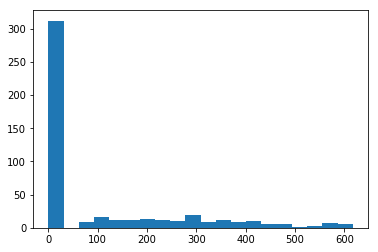

In [111]:
plt.hist(acceptedloan['Mortgage'],bins=20)

<H3> Observation : More than 350 customers out of 480 which is about 73% of the customers who availed loan have no house Mortgage. <H3>

<H3>Distribution of ccavg of customers who availed loan </H5>

Text(0.5,0,'Average spening on credit card')

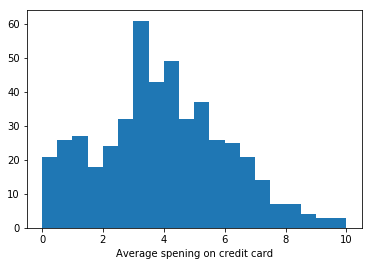

In [112]:
plt.hist(acceptedloan['CCAvg'],bins=20)
plt.xlabel('Average spening on credit card')

<H5> Observation : Average spending on credit card almost follows a normal distribution with few outliers</H5> 

<H1> correlation between the variables </H1>

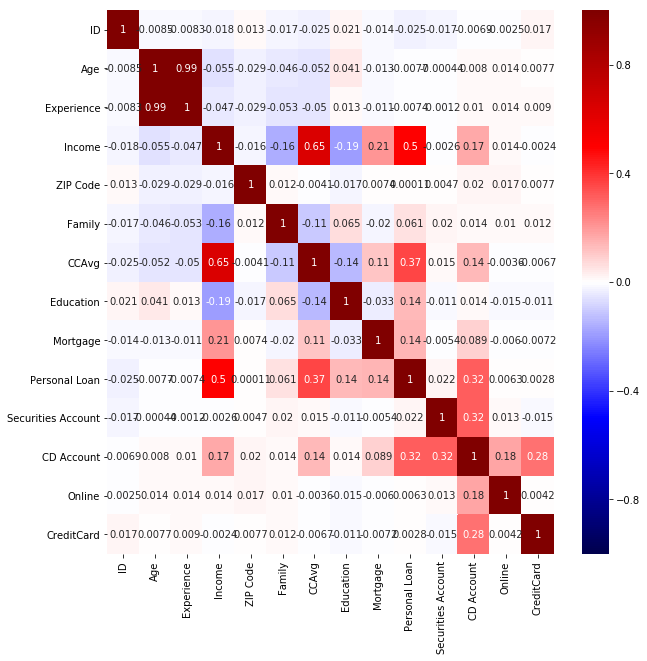

In [113]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(bank.corr(),annot=True,vmin=-1,vmax=1,cmap='seismic',ax=ax)

<H5> Observation : Personal Loan has a positive correlation with all the attribute except for the Id. Id is removed from the dataset since its not a needed attribute.</H5>

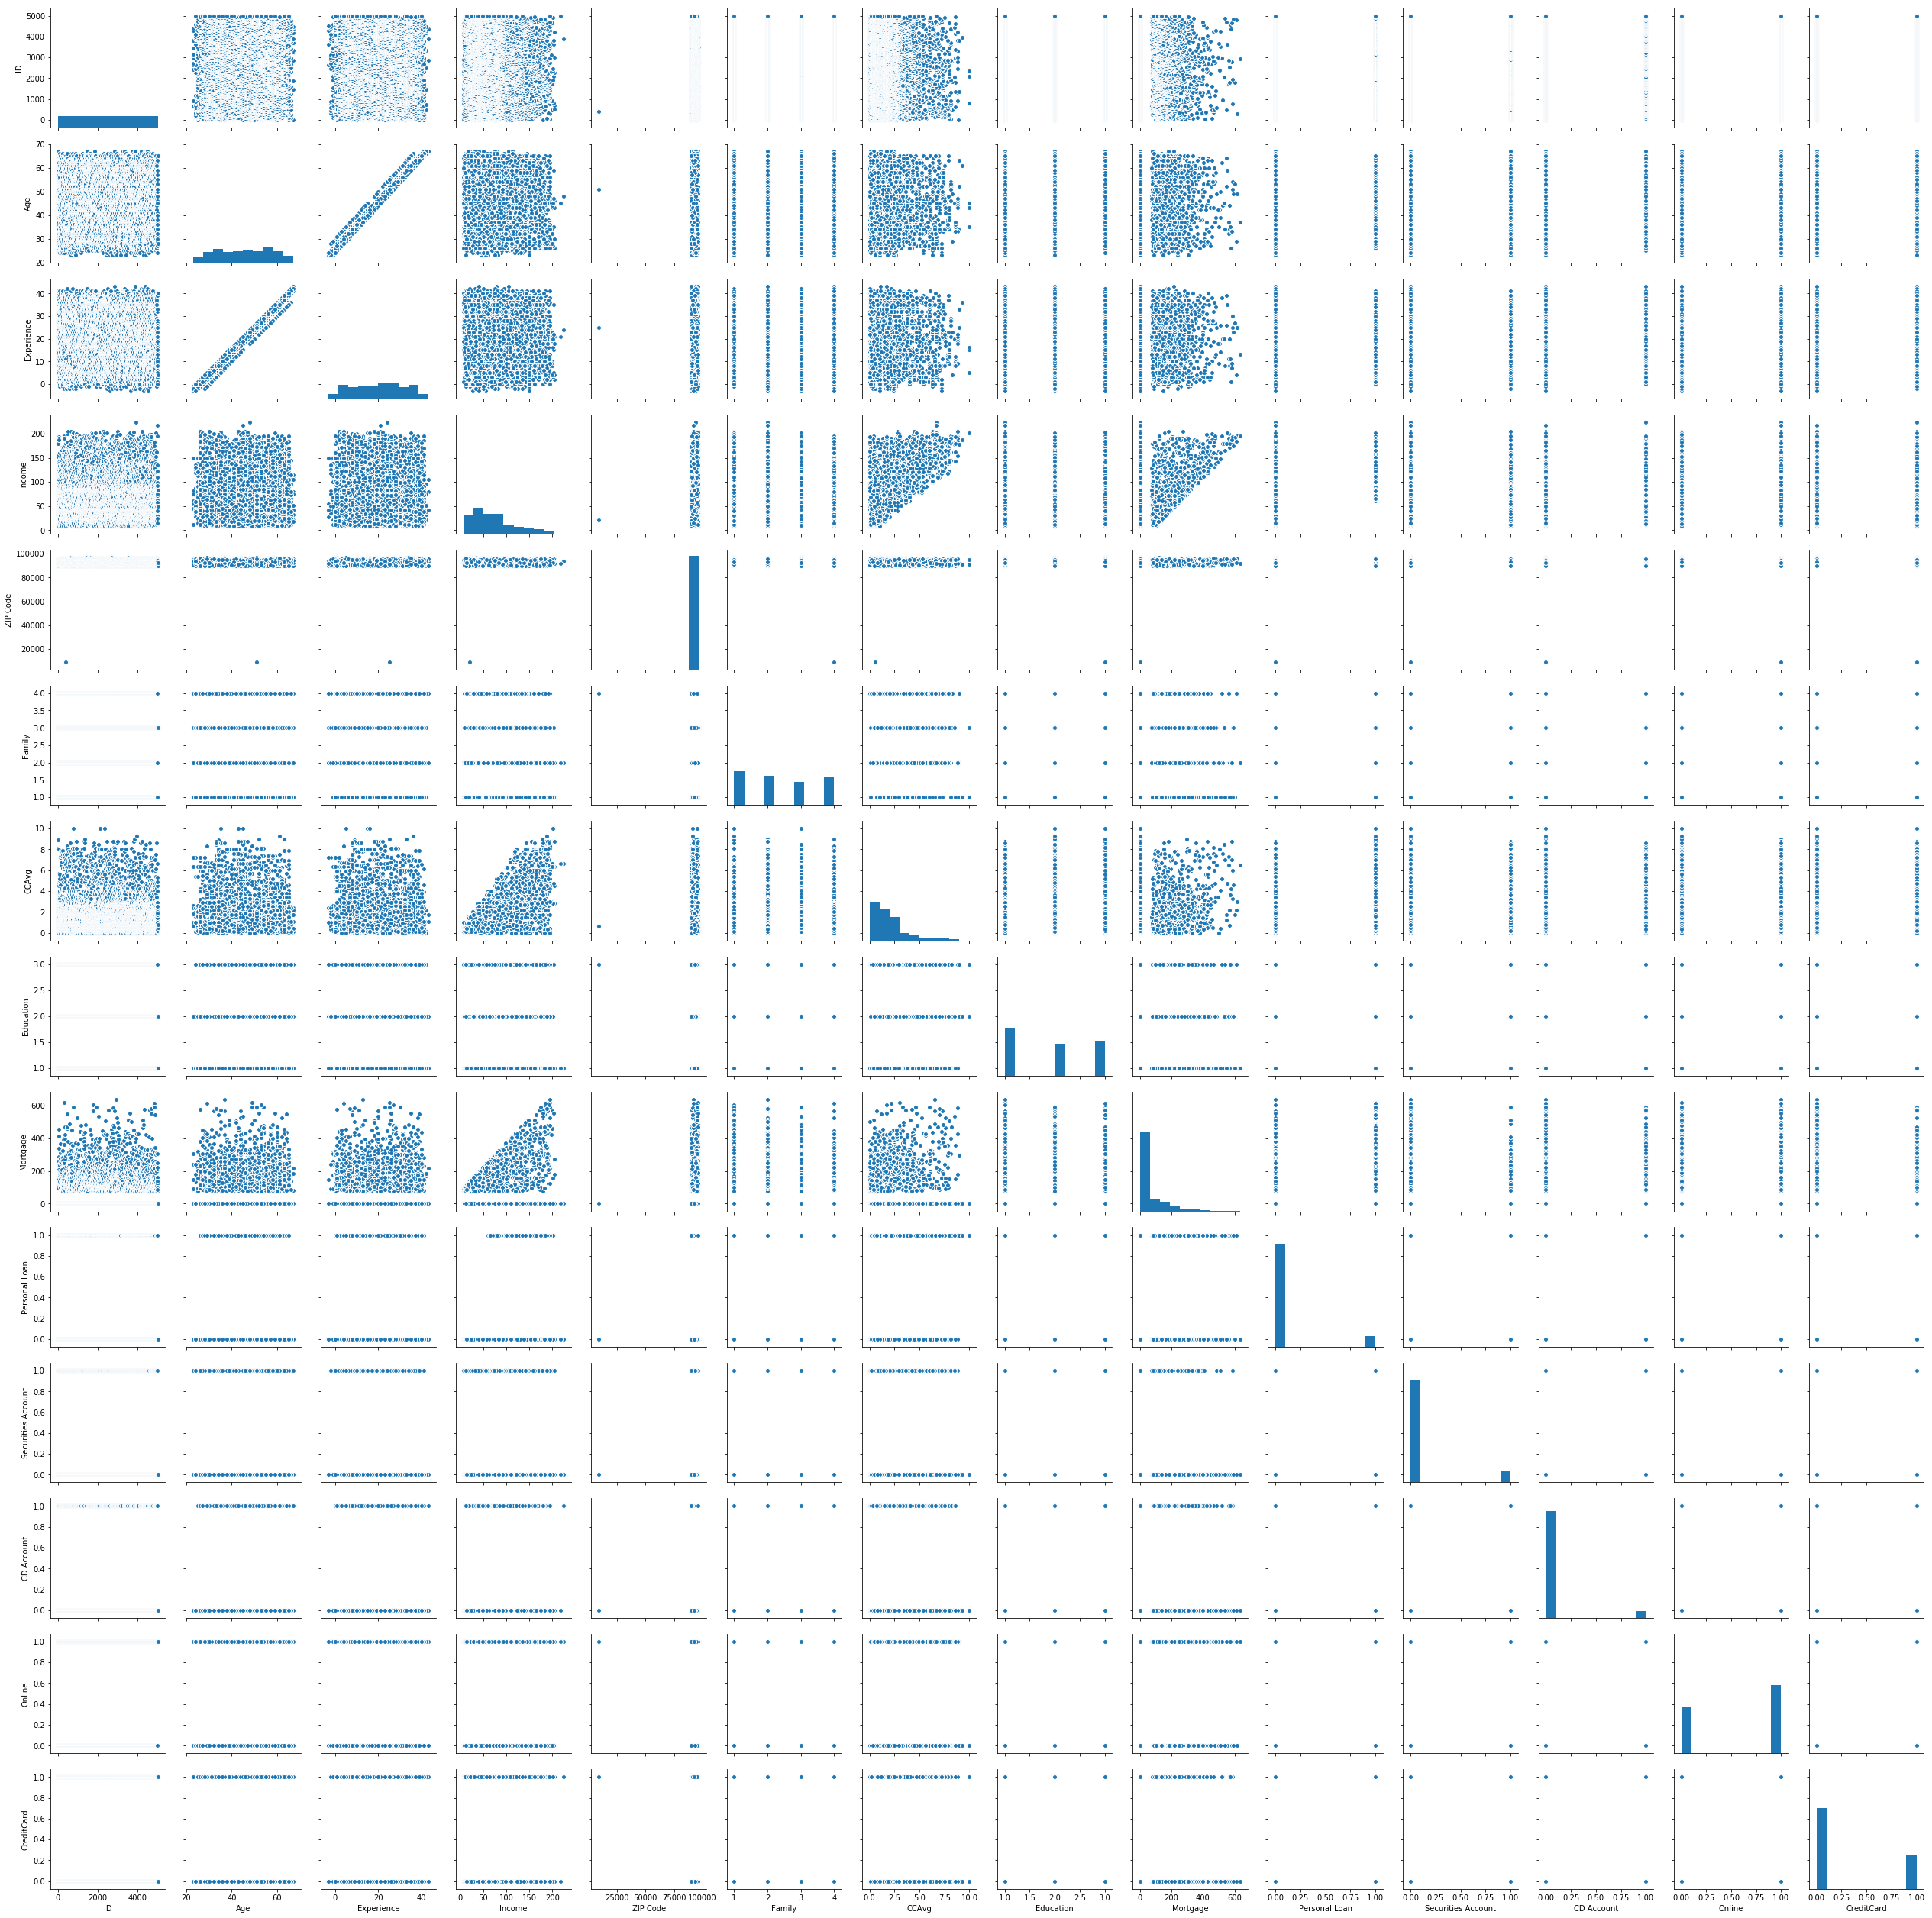

In [114]:
sns.pairplot(bank)

<H3> Observation : Age and Experience has a positive correlation which is also grouped with reaspect to the educational level. This is a valid reasoning since with increase in age experience also increases. therefore experience is removed from the independent variable to avoid overfitting. Zipcode is a weak attribute for model creation and hence it is removed. Education and family are ordinal catagorical variable and hence it will be encoded with dummy variable. The Last five column Personal loan, securities account, cd account, online, credit card are binary catagorical variable. Personal Loan is the independent variable 

<H1> 3. The target column distribution. </H1>

In [124]:
edu = pd.get_dummies(bank['Education'])
bank['edu_undergrad'] = edu[1]
bank['edu_grad'] = edu[2]

In [125]:
fam = pd.get_dummies(bank['Family'])
bank['fam_size_one'] = fam[1]
bank['fam_size_two'] = fam[2]
bank['fam_size_three'] = fam[3]

In [126]:
bank.drop(['Education','Family','ZIP Code','ID'],axis=1,inplace=True)

In [204]:
bank.head()

,Age,Experience,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,edu_undergrad,edu_grad,fam_size_one,fam_size_two,fam_size_three
0,25,1,49,1.6,0,0,1,0,0,0,1,0,0,0,0
1,45,19,34,1.5,0,0,1,0,0,0,1,0,0,0,1
2,39,15,11,1.0,0,0,0,0,0,0,1,0,1,0,0
3,35,9,100,2.7,0,0,0,0,0,0,0,1,1,0,0
4,35,8,45,1.0,0,0,0,0,0,1,0,1,0,0,0


In [164]:
#Target variable for logistic regression

X = bank.drop('Personal Loan',axis=1)
Y = bank['Personal Loan']

<H1> 4. Splitting the data into training and test set in the ratio of 70:30 respectively

In [165]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state=101)

<H1> 5. Using different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans 

<h3> Logistic Regression

In [166]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
model = logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)

predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

<h3> K-Neartest Neighbour

In [195]:
from sklearn.neighbors import KNeighborsClassifier

NNH = KNeighborsClassifier(n_neighbors= 1 , weights = 'uniform', metric='euclidean')

NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

<h3> Naive Bayes

In [196]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(X_train, y_train)

GaussianNB(priors=None)

<h1> 6. Printing the confusion matrix for all the above models

<h3> Logistic Regression

In [197]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics

print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.96      0.99      0.98      1354
          1       0.90      0.60      0.72       146

avg / total       0.95      0.95      0.95      1500



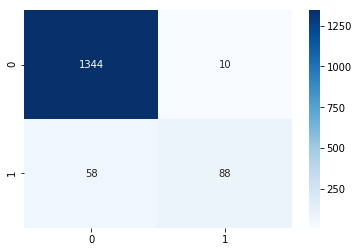

In [198]:
sns.heatmap(confusion_matrix(y_test,predictions), annot=True, cmap='Blues',fmt='g')

<h3> K- Nearest Neighbour

In [199]:
predicted_labels = NNH.predict(X_test)

print(classification_report(y_test,predicted_labels))

             precision    recall  f1-score   support

          0       0.94      0.95      0.95      1354
          1       0.49      0.45      0.47       146

avg / total       0.90      0.90      0.90      1500



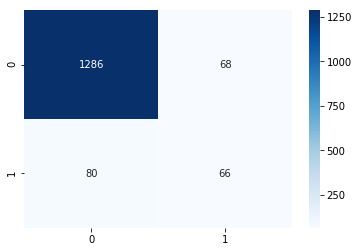

In [200]:
sns.heatmap(confusion_matrix(y_test,predicted_labels), annot=True, cmap='Blues',fmt='g')

<h3> Naive Bayes

In [182]:
predictions_nb = NB.predict(X_test)
print(classification_report(y_test, predictions_nb))

             precision    recall  f1-score   support

          0       0.95      0.93      0.94      1354
          1       0.44      0.55      0.49       146

avg / total       0.90      0.89      0.89      1500



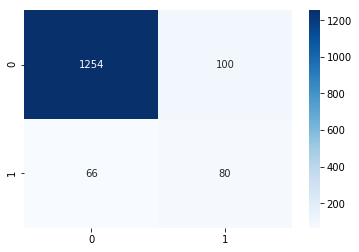

In [183]:
sns.heatmap(confusion_matrix(y_test,predictions_nb), annot=True, cmap='Blues',fmt='g')

<h1> 7. Summerizing my reasonings on which is the best model in this case 

<h3> Obervation : Out of the three models Logistic regrssion is the best model. Accuracy score of Logistic Regression is 95% , with KNN at 90% and Navie bayes at 89% . The dataset is not a gaussian distribution and its linear,Knn is not linear. Logistic regression involves directly modelling using logistics funtion and also considering the accuracy we can conclude that the Logistic regression is the best model